# Simulating Neighborhood Socio-Spatial Dynamics

By combining a few simple steps, `geosnap` is capable of simulating neighborhood change into the future. To do so, it relies on the notion of a spatially-conditioned Markov transition model. Put simply, if we know what Type a neighborhood used to be, and we know what Types of neighborhoods surround it, we can make an informed prediction about what Type the neighborhood is likely to be during the next time period. 

In [1]:
from geosnap import datasets, Community
import matplotlib.pyplot as plt

Loading manifest: 100%|██████████| 3/3 [00:00<00:00, 1523.72entries/s]


## Cluster Model

We start by developing a cluster model of neighborhood types, where each geographic unit can take on a different type in successive years

In [2]:
VARS = ['p_nonhisp_black_persons', 'p_nonhisp_white_persons', 'p_hispanic_persons', 'p_asian_persons', 'median_household_income', 'median_home_value', 'p_unemployment_rate', 'p_poverty_rate']

In [3]:
balt = Community.from_ltdb(msa_fips='12580', years=[1980, 1990, 2000, 2010])

/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [4]:
balt = balt.cluster(method='ward', k=6, columns=VARS)

SubplotsContainer([CartesianAxesSubplot(0.0430916,0.278056;0.163817x0.68162), CartesianAxesSubplot(0.272648,0.278056;0.204703x0.68162), CartesianAxesSubplot(0.522648,0.278056;0.204703x0.68162), CartesianAxesSubplot(0.772648,0.278056;0.204703x0.68162)])

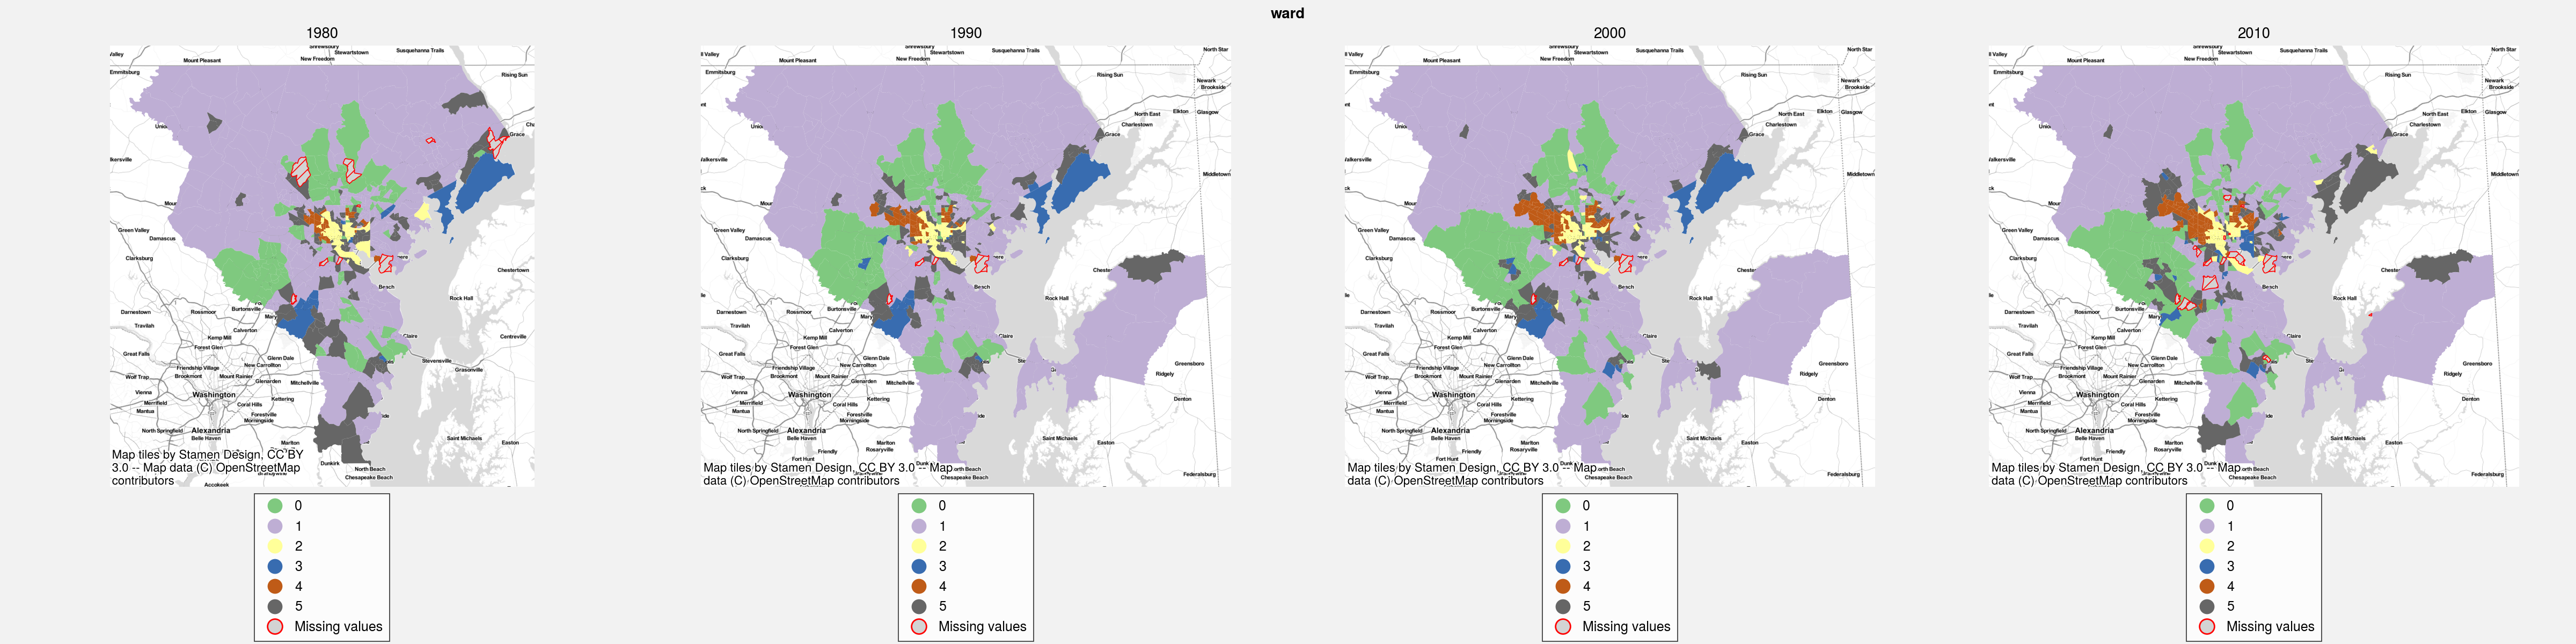

In [5]:
balt.plot_timeseries('ward', categorical=True, figsize=(24,6))

## Transition Model

For these neighborhood types we can create a transition model. The following heatmap shows which neighborhoods are likely to transition into each other type of neighborhood, and critically, how those probabilities change under different conditions of spatial context

array([<AxesSubplot:title={'center':'Global'}>,
       <AxesSubplot:title={'center':'Modal Neighbor - 0'}>,
       <AxesSubplot:title={'center':'Modal Neighbor - 1'}>,
       <AxesSubplot:title={'center':'Modal Neighbor - 2'}>,
       <AxesSubplot:title={'center':'Modal Neighbor - 3'}>,
       <AxesSubplot:title={'center':'Modal Neighbor - 4'}>,
       <AxesSubplot:title={'center':'Modal Neighbor - 5'}>,
       <AxesSubplot:>], dtype=object)

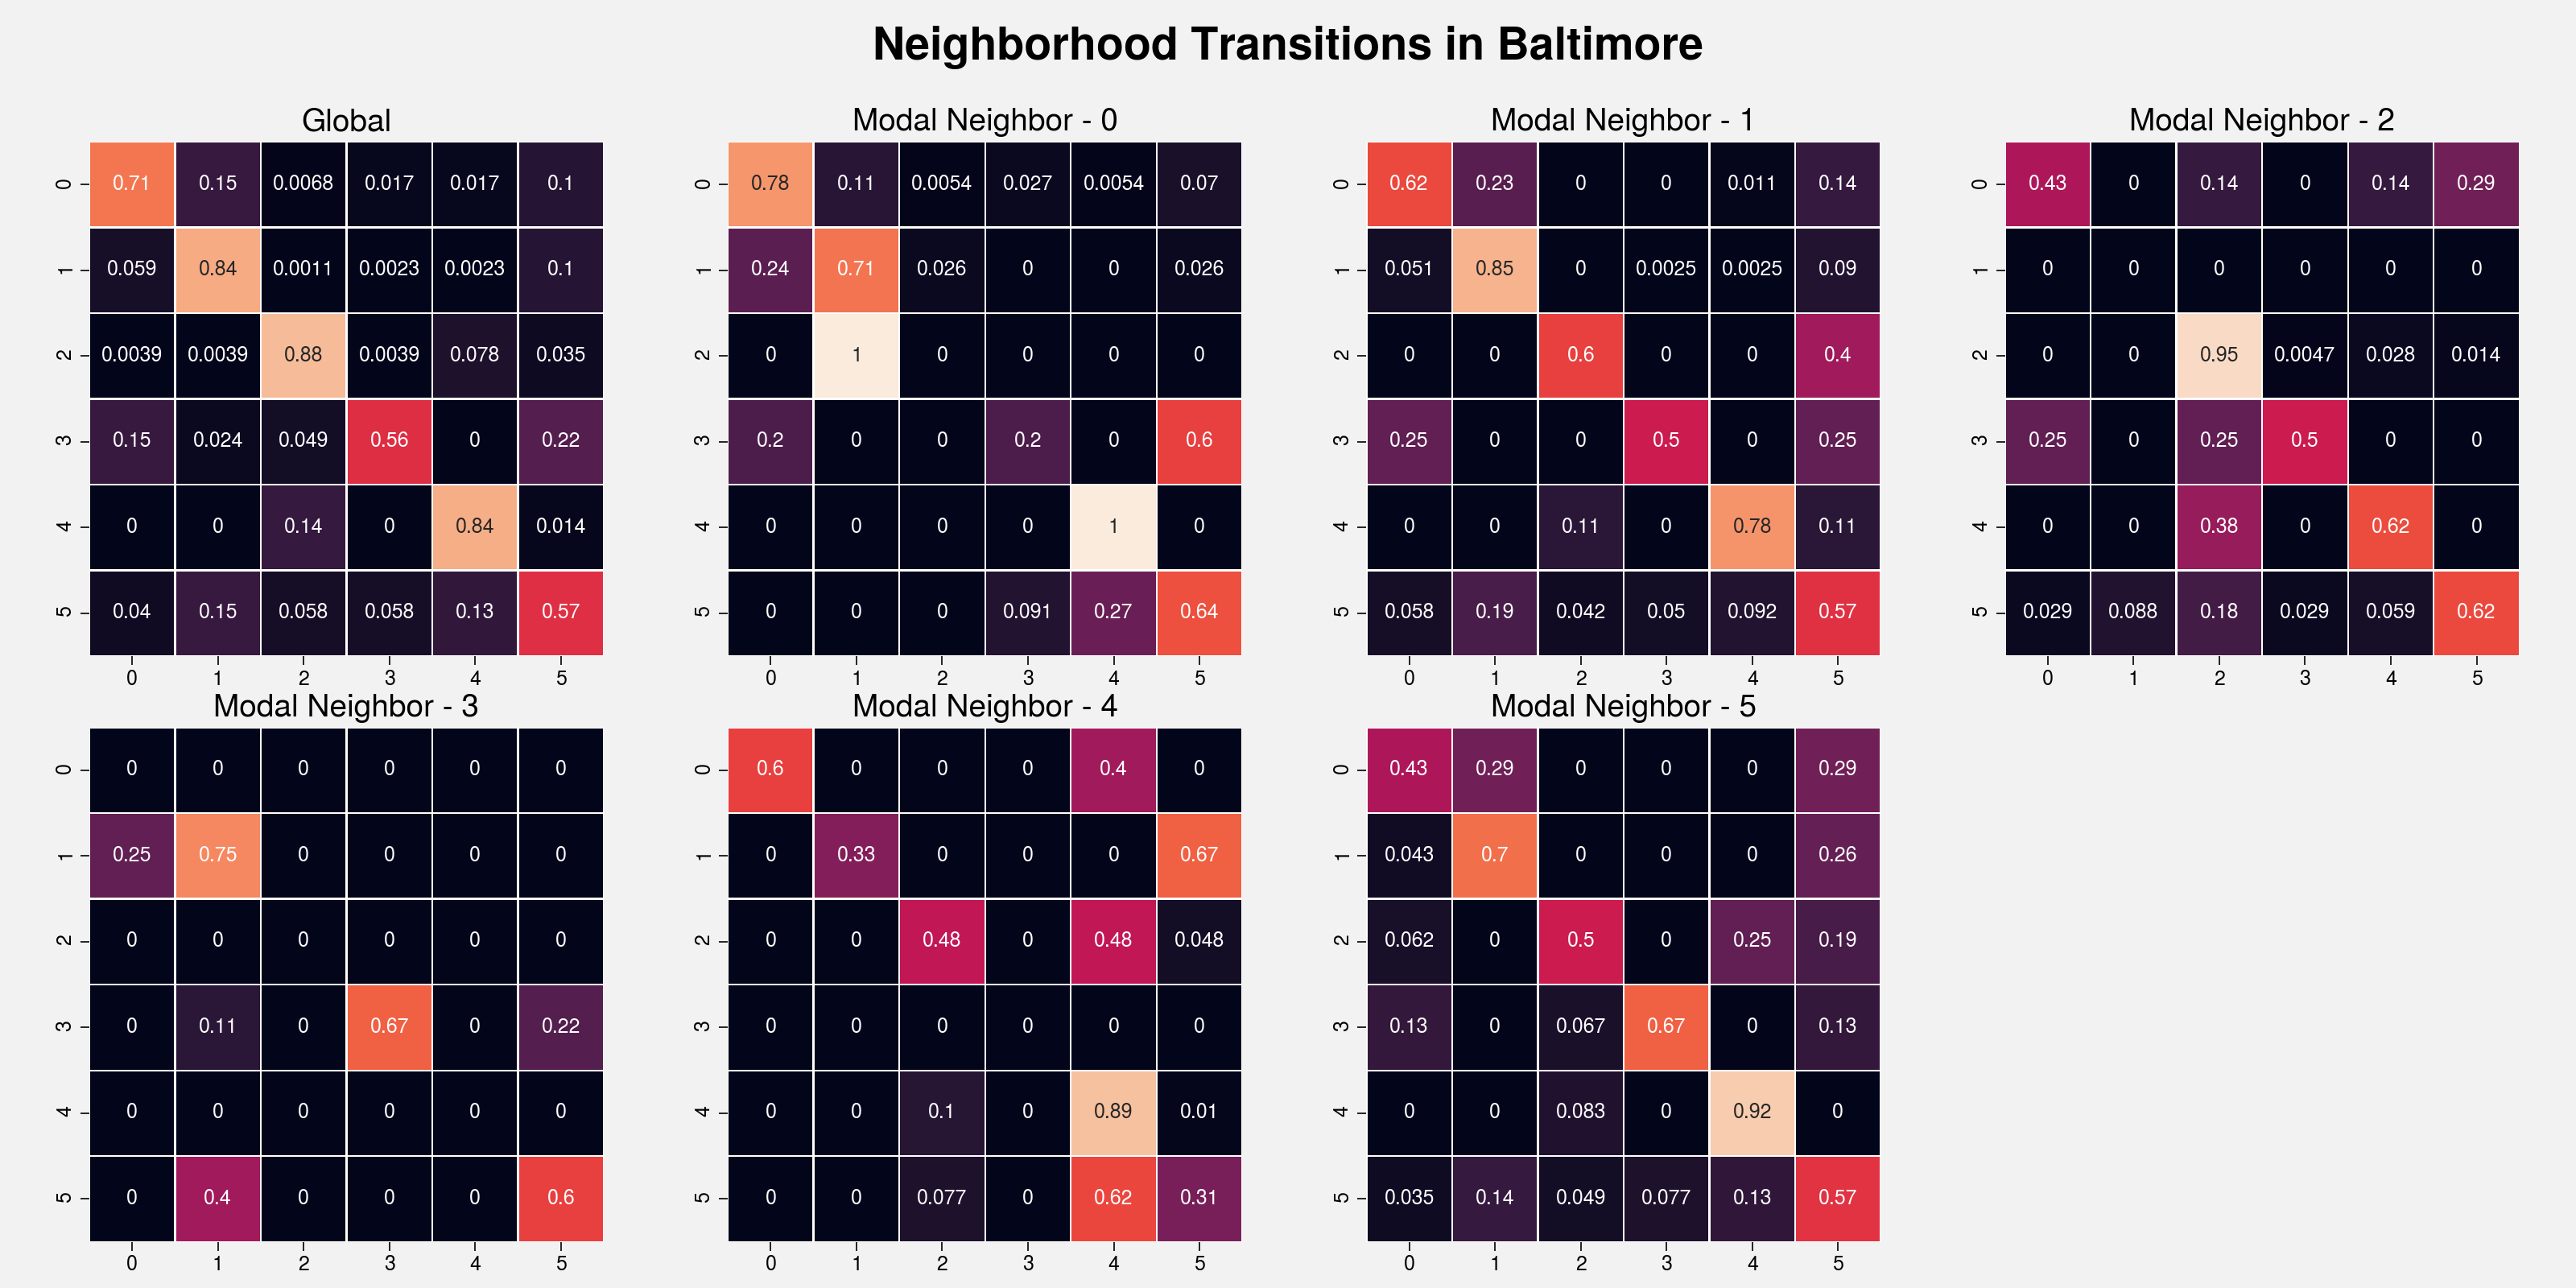

In [6]:
balt.plot_transition_matrix('ward', n_rows=2, n_cols=4, figsize=(16,8), suptitle='Neighborhood Transitions in Baltimore')

Another way of visualizing the transition matrices is as a network graph where neighborhood types are represented as nodes and the transition probabilities between them are represented as edges. 

In [ ]:
balt.plot_transition_graphs('ward', 'queen', output_dir="images/")

Here, the global (aspatial) transition matrix is laid out as a graph. We can see quickly that some neighborhood types like Type 2 have higher in-degree than out-degree, meaning many different neighborhood types transition into Type 2, but once there, Type 2 only transitions into a few other types

![img](images/ward_transitions_global.png)

## Simulating Neighborhood Change

If we expect these same socio-spatial dynamics to persist over time, then we can use our spatial Markov transition model to simulate neighborhood change into the future. The `predict` method takes a cluster model name and simulates forward for a specified number of time steps, then returns a new `Community` with the predicted data

In [9]:
predicted = balt.simulate('ward', base_year=2010, w_type='queen', time_steps=4)

/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
/Users/knaaptime/Dropbox/projects/geosnap/geosnap/analyze/analytics.py:590: RuntimeWarning: invalid value encountered in true_divide
  probs.sum()
/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, se

/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/geopandas/plotting.py:376: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/geopandas/plotting.py:376: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/geopandas/plotting.py:376: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/geopandas/plotting.py:376: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


SubplotsContainer([CartesianAxesSubplot(0.0195417,0.189435;0.225279x0.625111), CartesianAxesSubplot(0.266132,0.189435;0.225279x0.625111), CartesianAxesSubplot(0.512722,0.189435;0.225279x0.625111), CartesianAxesSubplot(0.759312,0.189435;0.225279x0.625111)])

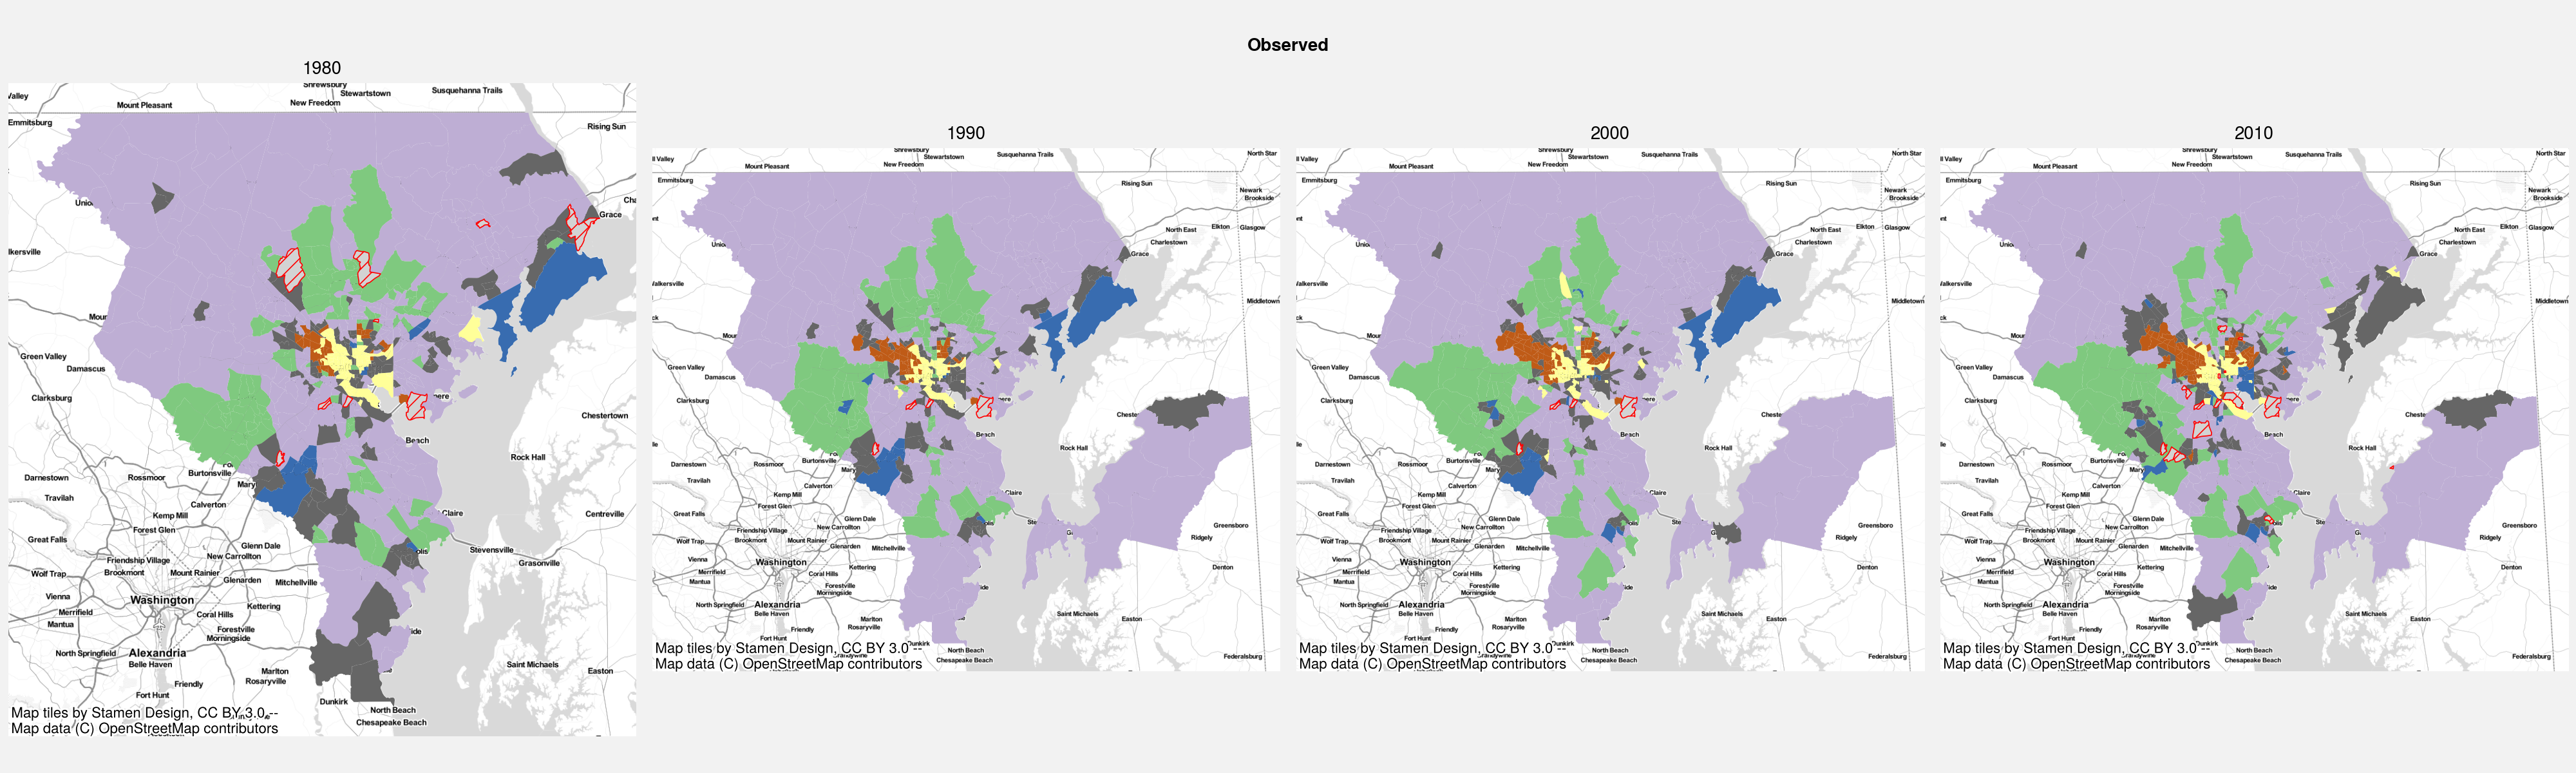

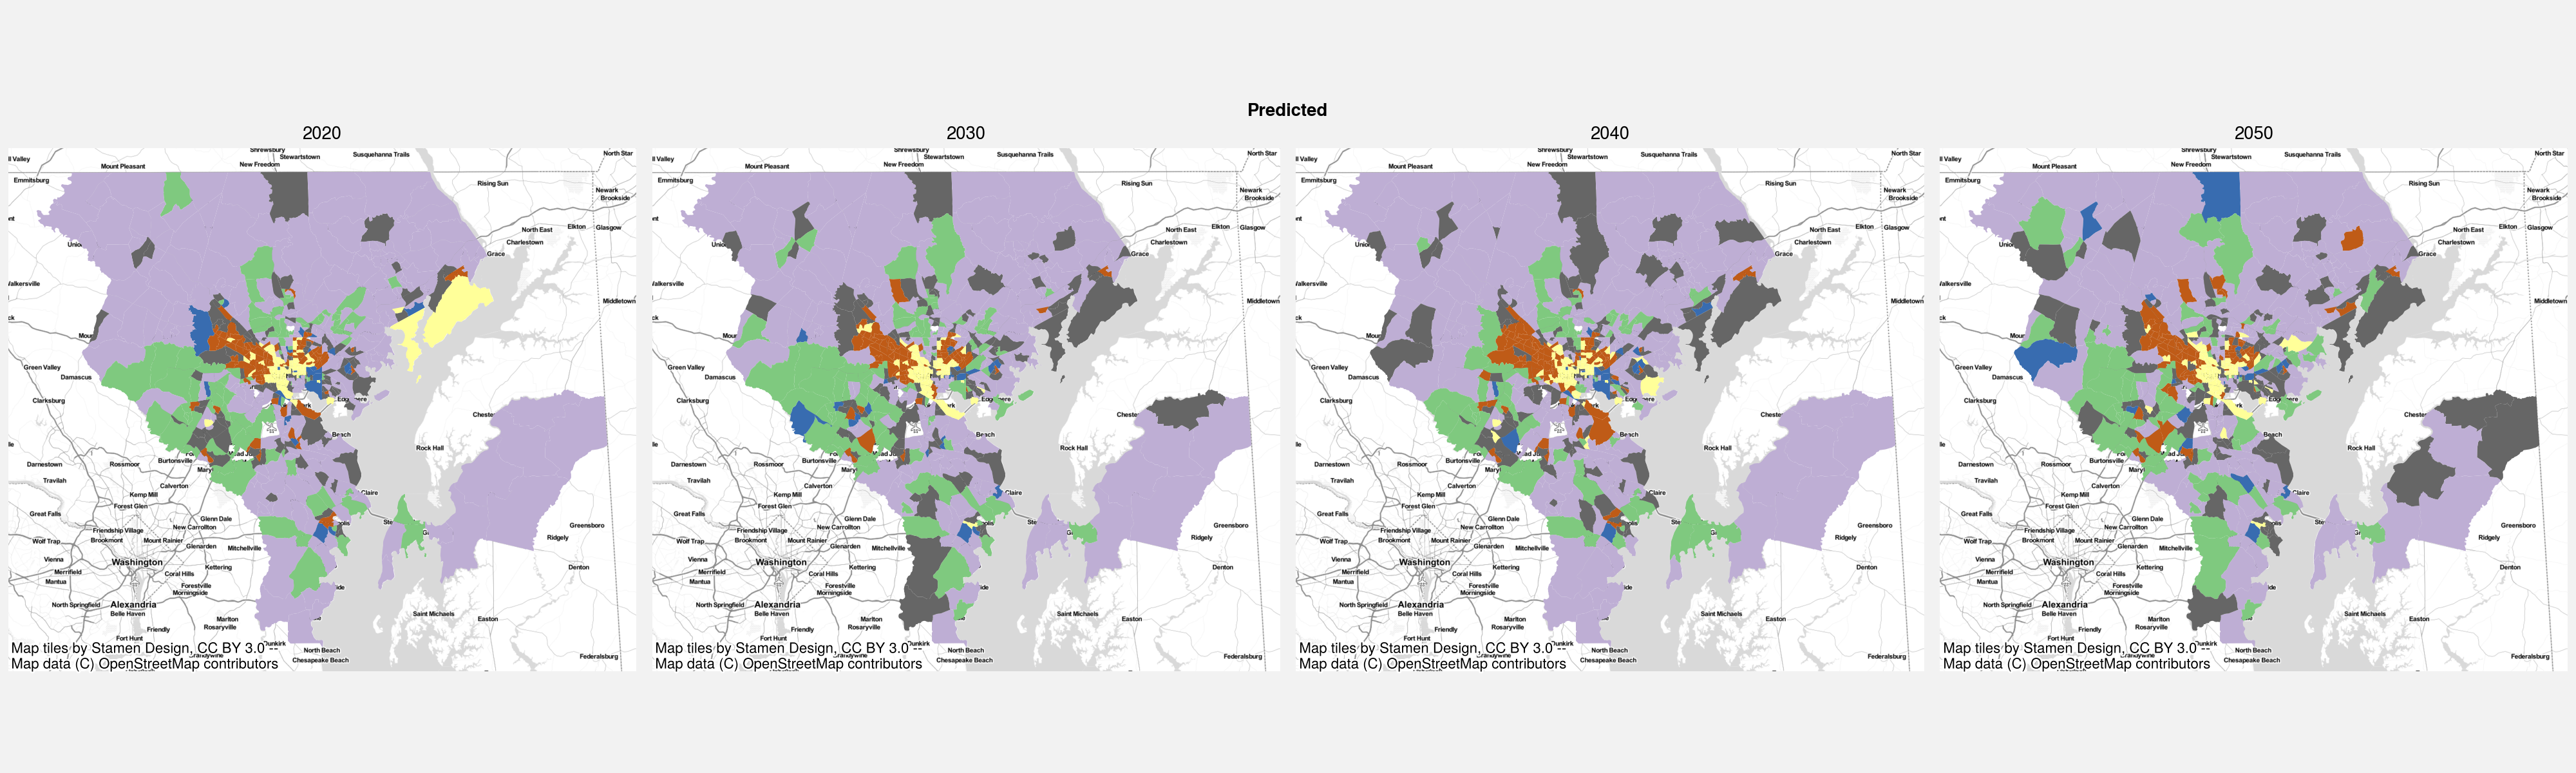

In [10]:
balt.plot_timeseries('ward', categorical=True, legend=False, figsize=(20,6), title='Observed')
predicted.gdf = predicted.gdf[predicted.gdf.year!=2010] # dont include the base year
predicted.plot_timeseries('ward', categorical=True, legend=False,figsize=(20,6), title='Predicted')

The top plot shows the observed neighborhood types over the 4 time periods from 1980 to 2010. The bottom plot shows the next four predicted time periods from 2020 to 2050, assuming the underlying transition model remains constant

For a more dynamic view of the neighborhood evolution process, we can create a simple animation from these data:

In [12]:
balt.gdf = balt.gdf[balt.gdf.year!= 1980]  #  in 1980, Queen Anne's county wasnt in the MSA, so the different bounds make the animation awkward
combined_sequence = Community.from_geodataframes([balt.gdf, predicted.gdf])

In [ ]:
combined_sequence.animate_timeseries('ward', categorical=True, filename='images/simulation.gif', dpi=200)

![simulation](images/simulation.gif)